In [7]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import json
from datetime import datetime

In [5]:
df = pd.read_csv("../data/hr_neighbors.csv")

print "total number of lines =", len(df)

df_clean = df[(df.numTxPackets > 0) & (df.numTxFailures >= 0) & (df.rssi<0) 
              #& (df.mac!="00-17-0d-00-00-b0-00-cc") & (df.neighborMac!="00-17-0d-00-00-b0-00-cc") 
             ]
df_clean.drop_duplicates(["time","mac"],inplace=True)
#print df_clean.head()
df_clean.loc[:,'pdr'] = pd.Series((df_clean.numTxPackets-df_clean.numTxFailures)/df_clean.numTxPackets, index=df_clean.index)

lines_removed = len(df) - len(df_clean)

print "number of lines left = ", len(df_clean), "(", float(len(df_clean))*100/len(df), "% )"
print "number of lines removed = ", lines_removed, "(", float(lines_removed)*100/len(df), "% )"

df_clean.head()

total number of lines = 30197
number of lines left =  11721 ( 38.8151140842 % )
number of lines removed =  18476 ( 61.1848859158 % )


/home/keoma/.local/lib/python2.7/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/keoma/.local/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/keoma/.local/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,time,mac,neighborMac,neighborFlag,rssi,numTxPackets,numTxFailures,numRxPackets,mote_board,ngbr_board,distance,pdr
0,1478099140,00-17-0d-00-00-38-00-63,00-17-0d-00-00-58-eb-5b,0,-68,67,8,1,huron,huron,13.9047,0.880597
2,1478100040,00-17-0d-00-00-38-00-63,00-17-0d-00-00-58-eb-5b,0,-69,74,10,2,huron,huron,13.9047,0.864865
4,1478100942,00-17-0d-00-00-38-00-63,00-17-0d-00-00-58-eb-5b,0,-72,76,12,2,huron,huron,13.9047,0.842105
6,1478101840,00-17-0d-00-00-38-00-63,00-17-0d-00-00-58-eb-5b,0,-70,70,8,1,huron,huron,13.9047,0.885714
8,1478102741,00-17-0d-00-00-38-00-63,00-17-0d-00-00-58-eb-5b,0,-71,66,4,2,huron,huron,13.9047,0.939394


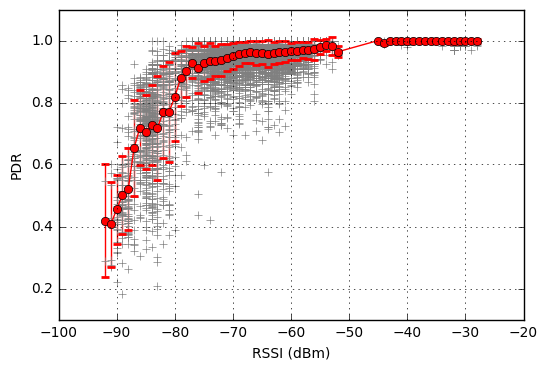

In [28]:
df_indexed = df_clean.set_index(df_clean["rssi"])

df_grouped = df_indexed.groupby(["rssi"])

mean_index = [name for name, group in df_grouped]
mean_pdr   = [group.pdr.mean() for name, group in df_grouped]
std_pdr    = [group.pdr.std() for name, group in df_grouped]

plt.plot(df_indexed.rssi, df_indexed.pdr, '+', color='grey')
plt.errorbar(mean_index, mean_pdr, std_pdr, fmt='-o', color='red', capthick=2)

plt.xlabel('RSSI (dBm)')
plt.ylabel('PDR')

plt.grid(True)

plt.show()